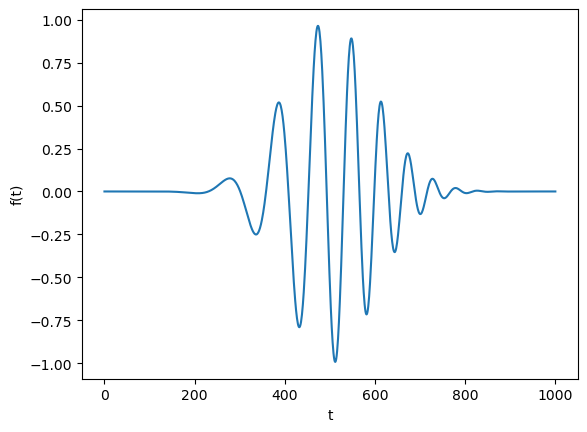

In [17]:
import numpy as np
import matplotlib.pyplot as plt

t_list = []
f = []
phi_list = []
curve = []


omega = 0.002
tau = 200
alpha = 10^2 
a = 500 # смещение 


f_t = lambda t, phi: np.exp((-2*(t-a)**2)/(tau**2))*np.cos(omega*t + phi)
phi_t = lambda t: (alpha*omega*(t**2))/tau

for t in range(1001):
  t_list.append(t)
  f.append(f_t(t, phi_t(t)))
  phi_list.append(phi_t(t))
  curve.append(np.exp((-2*(t-a)**2)/(tau**2)))

plt.plot(t_list, f)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

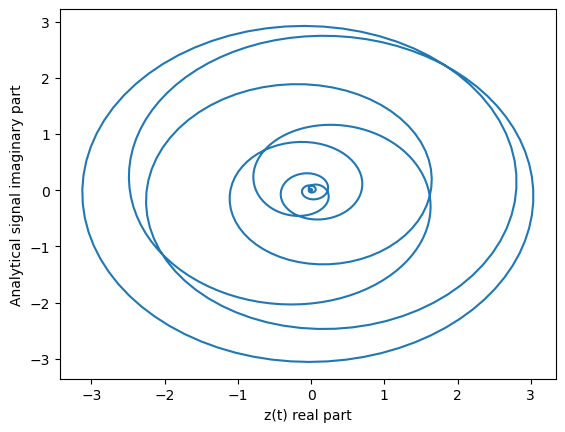

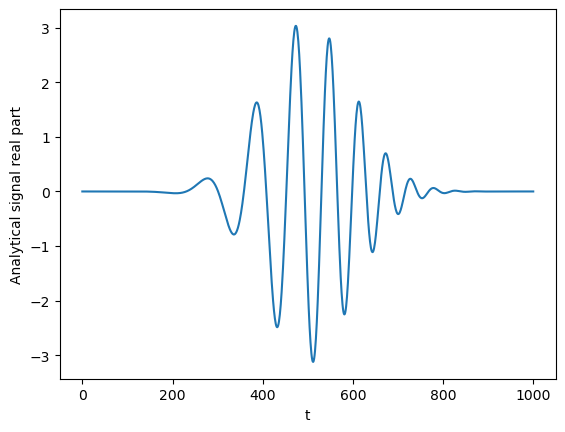

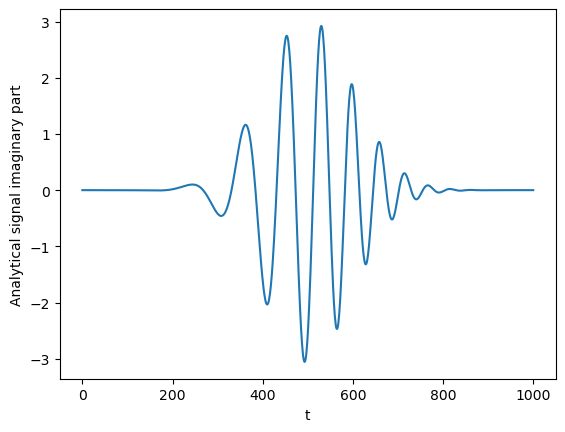

In [18]:
def HilbertTransform(signal):
    
    n = len(signal)
    dw = 2 * np.pi / (n - 1)
    freq = np.arange(0, dw * n, dw)
        
    # Преобразование Фурье сигнала
    signal_fft = np.fft.fft(signal)
    
    # Умножение на вектор частот
    signal_fft *= freq
    
    # Обратное преобразование Фурье
    hilbert_signal = np.fft.ifft(signal_fft)
    
    return hilbert_signal


hilbert_signal = HilbertTransform(signal=f)


# print(hilbert_signal)
plt.plot(hilbert_signal.real, hilbert_signal.imag)
plt.xlabel('z(t) real part')
plt.ylabel('Analytical signal imaginary part')
plt.show()

plt.plot(t_list, hilbert_signal.real)
plt.xlabel('t')
plt.ylabel('Analytical signal real part')
plt.show()

plt.plot(t_list, hilbert_signal.imag)
plt.xlabel('t')
plt.ylabel('Analytical signal imaginary part')
plt.show()


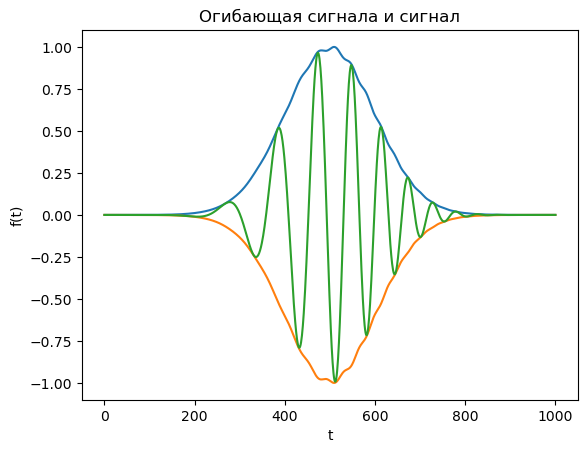

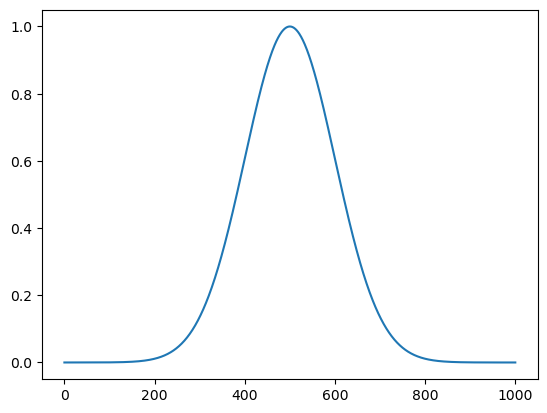

In [19]:
# Расчет фазы
# Восстановление графика с нормировкой
def normalize(data):

    min_val = np.min(data)
    max_val = np.max(data)
    
    normalized_data = (data - min_val) / (max_val - min_val)
    
    return normalized_data


phase = np.unwrap(np.angle(hilbert_signal))
norm_hilbert_signal = normalize(data=np.abs(hilbert_signal)) 


# две огибающие
plt.plot(t_list, norm_hilbert_signal)
plt.plot(t_list, -1*np.array(norm_hilbert_signal))
plt.plot(t_list, f)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Огибающая сигнала и сигнал')
plt.show()

plt.plot(t_list, curve)
plt.show()

MSE
2.6264616222875385e-05


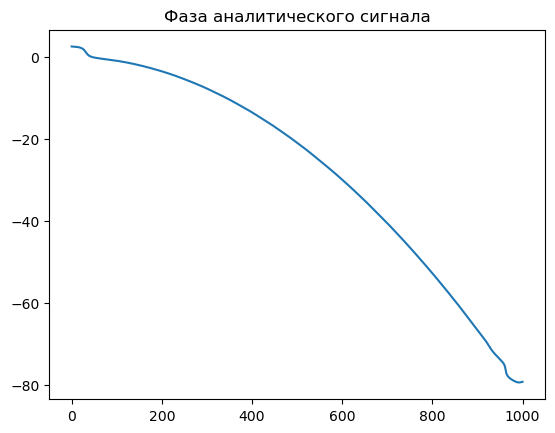

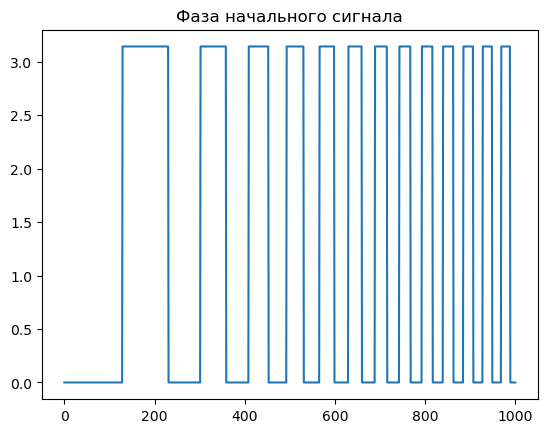

In [20]:
phase_f = np.unwrap(np.angle(f))
mse = np.mean((norm_hilbert_signal - curve)**2)
print('MSE')
print(mse)


plt.title('Фаза аналитического сигнала')
plt.plot(t_list, phase)
plt.show()


plt.title('Фаза начального сигнала')
plt.plot(t_list, phase_f)
plt.show()

Работа с шумом

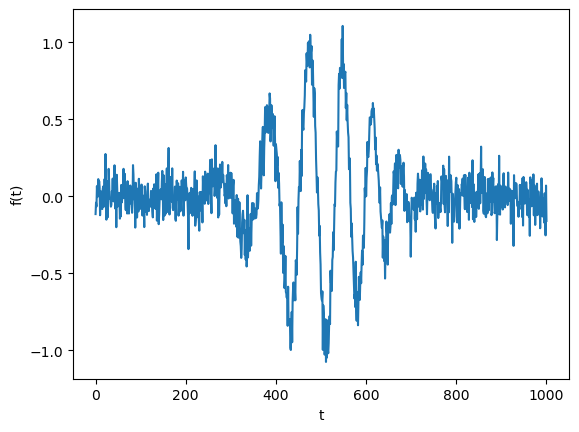

In [13]:
import numpy as np
import matplotlib.pyplot as plt

t_list = []
f = []
phi_list = []
curve = []


omega = 0.002
tau = 200
alpha = 10^2 
a = 500 # смещение 


f_t = lambda t, phi: np.exp((-2*(t-a)**2)/(tau**2))*np.cos(omega*t + phi)
phi_t = lambda t: (alpha*omega*(t**2))/tau

for t in range(1001):
  t_list.append(t)
  f.append(f_t(t, phi_t(t)))
  phi_list.append(phi_t(t))
  curve.append(np.exp((-2*(t-a)**2)/(tau**2)))



mean = 0
std_dev = 0.1

noise = np.random.normal(mean, std_dev, 1001)

# Добавление шума к сигналу
f = f + noise


plt.plot(t_list, f)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()
# Далее пропускать остальные блокноты, поскольку в памяти мы работаем с теми же аргументами  